In [71]:
# Importing Libraries

# Data manipulation
import numpy as np
import pandas as pd

# To plot
import matplotlib.pyplot as plt
import seaborn
plt.style.use('ggplot')

# BS Model
import mibian

In [72]:
# Nifty futures price 
nifty_april_fut = 10595.40
nifty_may_fut = 10625.50

april_strike_price = 10600
may_strike_price = 10800

april_call_price = 10
may_call_price = 82
setup_cost = may_call_price - april_call_price

# Today's date is 20 April 2018. Therefore, days to April expiry is 7 days and days to May expiry is 41 days.
days_to_expiry_april_call = 6
days_to_expiry_may_call = 41

# Range of values for Nifty
sT = np.arange(0.97*nifty_april_fut,1.03*nifty_april_fut,1) 

#interest rate for input to Black-Scholes model
interest_rate = 0.0

In [73]:
# Front-month IV
april_call_iv = mibian.BS([nifty_april_fut, april_strike_price, interest_rate, days_to_expiry_april_call], 
                        callPrice=april_call_price).impliedVolatility
print "Front Month IV %.2f" % april_call_iv,"%"

# Back-month IV
may_call_iv = mibian.BS([nifty_may_fut, may_strike_price, interest_rate, days_to_expiry_may_call], 
                        callPrice=may_call_price).impliedVolatility
print "Back Month IV %.2f" % may_call_iv,"%"

Front Month IV 8.53 %
Back Month IV 11.26 %


In [74]:
# Changing days to expiry to a day before the front-month expiry
days_to_expiry_april_call = 0.001
days_to_expiry_may_call = 35 - days_to_expiry_april_call

df = pd.DataFrame()
df['nifty_price'] = sT
df['april_call_price'] = np.nan
df['may_call_price'] = np.nan

# Calculating call price for different possible values of Nifty
for i in range(0,len(df)):
    df.loc[i,'april_call_price'] = mibian.BS([df.iloc[i]['nifty_price'], april_strike_price, interest_rate, days_to_expiry_april_call], 
                                           volatility=april_call_iv).callPrice
    
    # Since, interest rate is considered 0%, 35 is added to the nifty price to get the Nifty December futures price. 
    df.loc[i,'may_call_price'] = mibian.BS([df.iloc[i]['nifty_price']+35, may_strike_price, interest_rate, days_to_expiry_may_call], 
                                           volatility=may_call_iv).callPrice
df.head()

,nifty_price,april_call_price,may_call_price
0,10277.538,0.0,27.305711
1,10278.538,0.0,27.455138
2,10279.538,0.0,27.605211
3,10280.538,0.0,27.755935
4,10281.538,0.0,27.907309


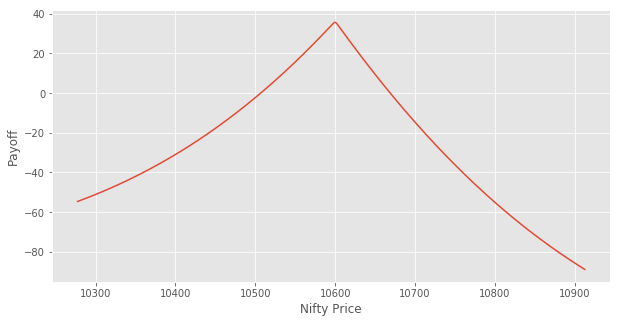

In [75]:
df['payoff'] = df.may_call_price - df.april_call_price - setup_cost
plt.figure(figsize=(10,5))
plt.ylabel("Payoff")
plt.xlabel("Nifty Price")
plt.plot(sT,df.payoff)
plt.show()

In [76]:
max_profit = max(df['payoff'])
min_profit = min(df['payoff'])

print "%.2f" %max_profit
print "%.2f" %min_profit

35.55
-88.94
